## Ejercicio Banco Gradio

La librería Gradio es una herramienta de Python que sirve para crear interfaces gráficas interactivas de manera muy sencilla, pensada sobre todo para modelos de machine learning, data science o IA.

Con pocas líneas de código puedes:
* Montar un demo web de tu modelo (ejemplo: subir una imagen y ver la predicción).
* Probar funciones de Python con una interfaz visual (inputs de texto, sliders, checkboxes, etc.).
* Compartir tu aplicación con un link público sin necesidad de programar una web desde cero

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import lime 
from lime import lime_tabular
import gradio as gr
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df_bank = pd.read_csv('bank-full.csv',sep=';')

In [5]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df_bank['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [7]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
lista_numericas = ['age','balance','duration','day','pdays','previous','campaign']

In [9]:
lista_categoricas = ['job','marital','education','contact','month','poutcome']

In [10]:
categoricas_binarias = ['default','housing','loan','y']

In [11]:
# Cambiamos las variabes binarias a si/no

for i in categoricas_binarias:
    df_bank[i] = [0 if x == 'no' else 1 for x in df_bank[i]]

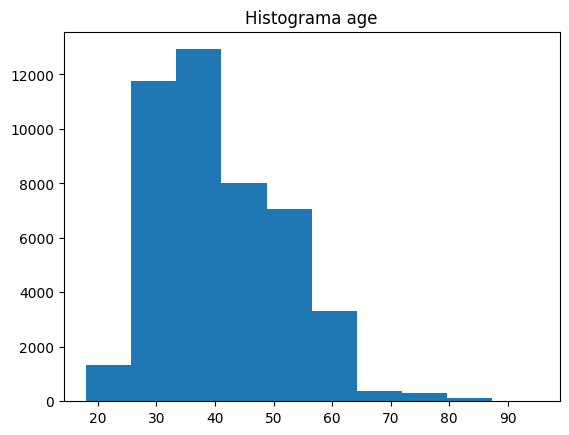

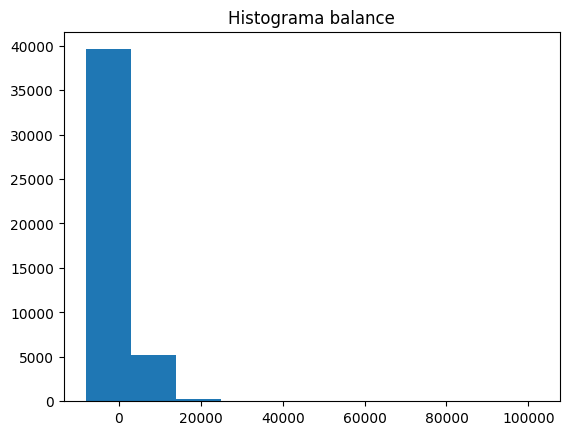

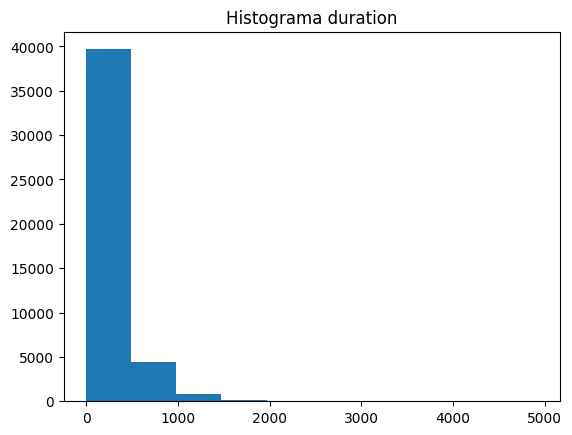

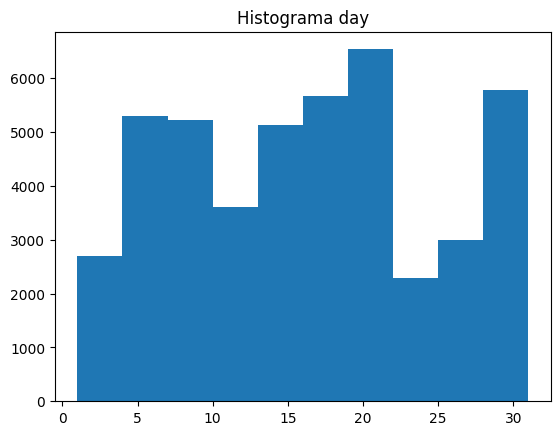

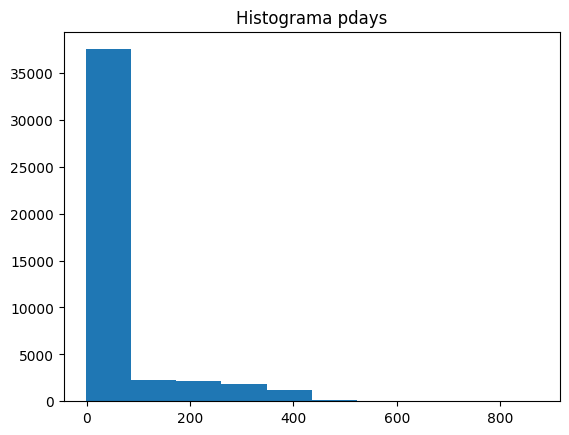

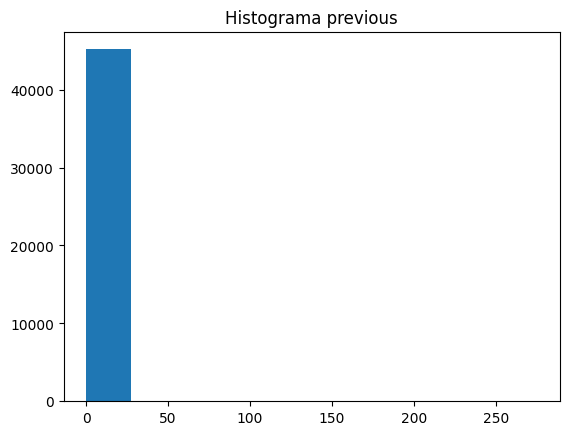

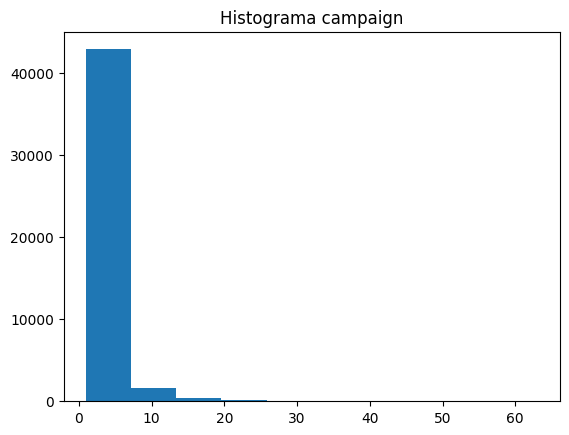

In [12]:
for i in lista_numericas:
    plt.hist(df_bank[i])
    plt.title(f'Histograma {i}')
    plt.show()


In [13]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Preprocesado rápido

In [14]:
# transformamos las variables a dummies

for i in lista_categoricas:
    dummies = pd.get_dummies(df_bank[i],prefix = i, dtype=int)
    df_bank = pd.concat([df_bank,dummies], axis =1)

In [15]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,0,0,1,0,0,0,0,0,0,1
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [16]:
le = LabelEncoder()

In [17]:
## También a numéricas
df_bank.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                      (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

df_bank.education.replace(('primary','secondary','tertiary','unknown'),
                      (1,2,3,4),inplace=True)

df_bank.marital.replace(('married','single','divorced'),
                      (1,2,3),inplace=True)

df_bank.contact.replace(('cellular','unknown','telephone'),
                      (1,2,3),inplace=True)

df_bank.poutcome.replace(('failure','unknown','other','success'),
                      (1,2,3,4),inplace=True) 

C:\Users\pauri\AppData\Local\Temp\ipykernel_5280\816278784.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
C:\Users\pauri\AppData\Local\Temp\ipykernel_5280\816278784.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

In [18]:
le.fit(df_bank.job.unique())
le.classes_

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [19]:
df_bank['job'].head()

0      management
1      technician
2    entrepreneur
3     blue-collar
4         unknown
Name: job, dtype: object

In [20]:
le.transform(df_bank.job)

array([4, 9, 2, ..., 5, 1, 2], shape=(45211,))

In [21]:
df_bank['job'] = le.transform(df_bank.job)

In [22]:
df_bank['job'].head()

0     4
1     9
2     2
3     1
4    11
Name: job, dtype: int64

In [23]:
corr = abs(df_bank.corr())
corr[['y']].sort_values(by = 'y', ascending=False).style.background_gradient()

,y
y,1.000000
duration,0.394521
poutcome_success,0.306788
poutcome,0.213476
poutcome_unknown,0.167051
contact_unknown,0.150935
housing,0.139173
contact_cellular,0.135873
month_mar,0.129456
month_oct,0.128531


In [24]:
df_bank.rename(columns={'job_admin.':'job_admin','job_blue-collar':'job_blue_collar','job_sef-employed':'job_self_employed'},inplace=True)

### Muestreo estratificado

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_bank.drop('y',axis=1),
                                                    df_bank.y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = df_bank.y)

### Modelos

In [26]:
model1 = RandomForestClassifier().fit(X_train,y_train)
y_pred = model1.predict(X_test)

<Axes: >

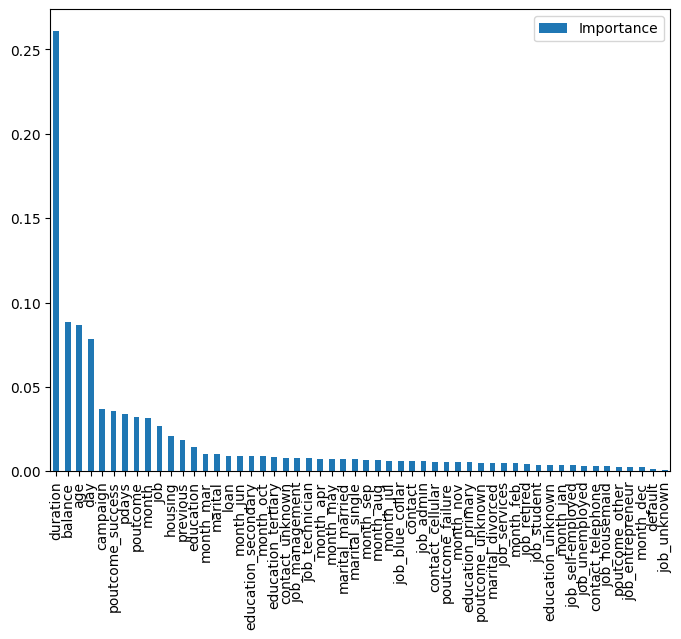

In [27]:
feat_importances = pd.DataFrame(model1.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [28]:
def saca_metricas(y1, y2):
    print('Matriz de Confusión')
    print(confusion_matrix(y1, y2))
    print('Accuracy:', accuracy_score(y1, y2))
    print('Precision:', precision_score(y1, y2))
    print('Recall:', recall_score(y1, y2))
    print('F1 Score:', f1_score(y1, y2))
    
    # Cálculo de la curva ROC y AUC
    false_positive_rate, recall, _ = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC:', roc_auc)
    
    # Crear gráfico interactivo con Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=false_positive_rate, y=recall, mode='lines', name='Curva ROC', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Línea base', line=dict(color='red', dash='dash')))
    
    fig.update_layout(
        title=f'Curva ROC (AUC = {roc_auc:.2f})',
        xaxis_title='False Positive Rate',
        yaxis_title='Recall',
        template='plotly_white'
    )
    
    fig.show()

In [29]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[7772  213]
 [ 639  419]]
Accuracy: 0.905783478933982
Precision: 0.6629746835443038
Recall: 0.3960302457466919
F1 Score: 0.4958579881656805
AUC: 0.6846776150461701


### GRADIO INTERFACE

En Gradio, la clase (o función) Interface es la más usada: sirve para crear una aplicación web interactiva a partir de una función de Python.

En pocas palabras:
* Tú defines una función (por ejemplo, que reciba texto y devuelva texto, o una imagen y devuelva una predicción).
* Con gr.Interface le dices a Gradio qué inputs y qué outputs usar.
* Al lanzar la app, Gradio genera una interfaz gráfica en el navegador para que cualquiera pueda probarla.

In [ ]:
def df_bank_function(*inputs): # definimos función que recibe un numero de variables (*inputs)
    prediction = model1.predict([inputs]) # se usa el model1 introduciendole los inputs
    return prediction # deuelve la variable prediction, que es el predict de nuestro modelo con los inputs

In [ ]:
output = gr.Textbox(label = 'clase5 predicción') # gr.TextBox crea una caja de salida en gradio y label = 'clase5 prediccion' pone ese texto encima de la caja de salida

In [ ]:
gr.Interface(fn=df_bank_function, # Función que se aplicara al recibir los inputs en gradio
             inputs = [gr.Number(label=i) for i in X_train.columns], # el input es un valor numerico para cada valor de columna de X_train
             outputs = output, flagging_mode = 'manual').launch() # output es la variable anteriormente definida, flagging_mode = 'manual' activa un boyon Flag en la interfaz, y launch() sirve para lanzar la app

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


C:\Users\pauri\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

C:\Users\pauri\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



### Gradio Lime

In [33]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, 
                                                   mode='classification',
                                                   training_labels=y_train,
                                                   feature_names=X_train.columns)

In [34]:
def df_bank_function(*inputs):
    preds = model1.predict_proba([inputs])
    pred_mapping = dict(zip(y_train, preds[0]))
    
    explanation = explainer.explain_instance(np.array(inputs), model1.predict_proba, num_features=len(X_train.columns), top_labels = 4)
    interpretation = explanation.as_pyplot_figure(label=prediction[0])
    
    plt.tight_layout()
    return pred_mapping,interpretation

In [ ]:
with gr.Blocks() as demo: # gr.Blocks es para generar páginas más complejas
    gr.Markdown('# Bank marketing campaign prediction')
    with gr.Row():
        with gr.Column():
            gr.Markdown("## Select features to predict")
            inputs = [gr.Number(label=i) for i in X_train.columns]
            predict = gr.Button("Predict")
            
        with gr.Column():
            pred_label = gr.Label("")
            plot_placeholder = gr.Plot()
        predict.click(df_bank_function, 
                      inputs=inputs, 
                      outputs=[pred_label, plot_placeholder])
demo.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


C:\Users\pauri\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

C:\Users\pauri\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

Traceback (most recent call last):
  File "C:\Users\pauri\AppData\Roaming\Python\Python313\site-packages\gradio\queueing.py", line 667, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
    )
    ^
  File "C:\Users\pauri\AppData\Roaming\Python\Python313\site-packages\gradio\route_utils.py", line 349, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<11 lines>...
    )
    ^
  File "C:\Users\pauri\AppData\Roaming\Python\P